In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
salary_test = pd.read_csv(r'C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
salary_train = pd.read_csv(r'C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_train.shape

(30161, 14)

In [5]:
salary_test.shape

(15060, 14)

In [6]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
salary_train.duplicated().sum()

3258

In [8]:
salary_test.duplicated().sum()

930

In [9]:
salary_train.drop_duplicates(inplace =True)
salary_test.drop_duplicates(inplace = True)

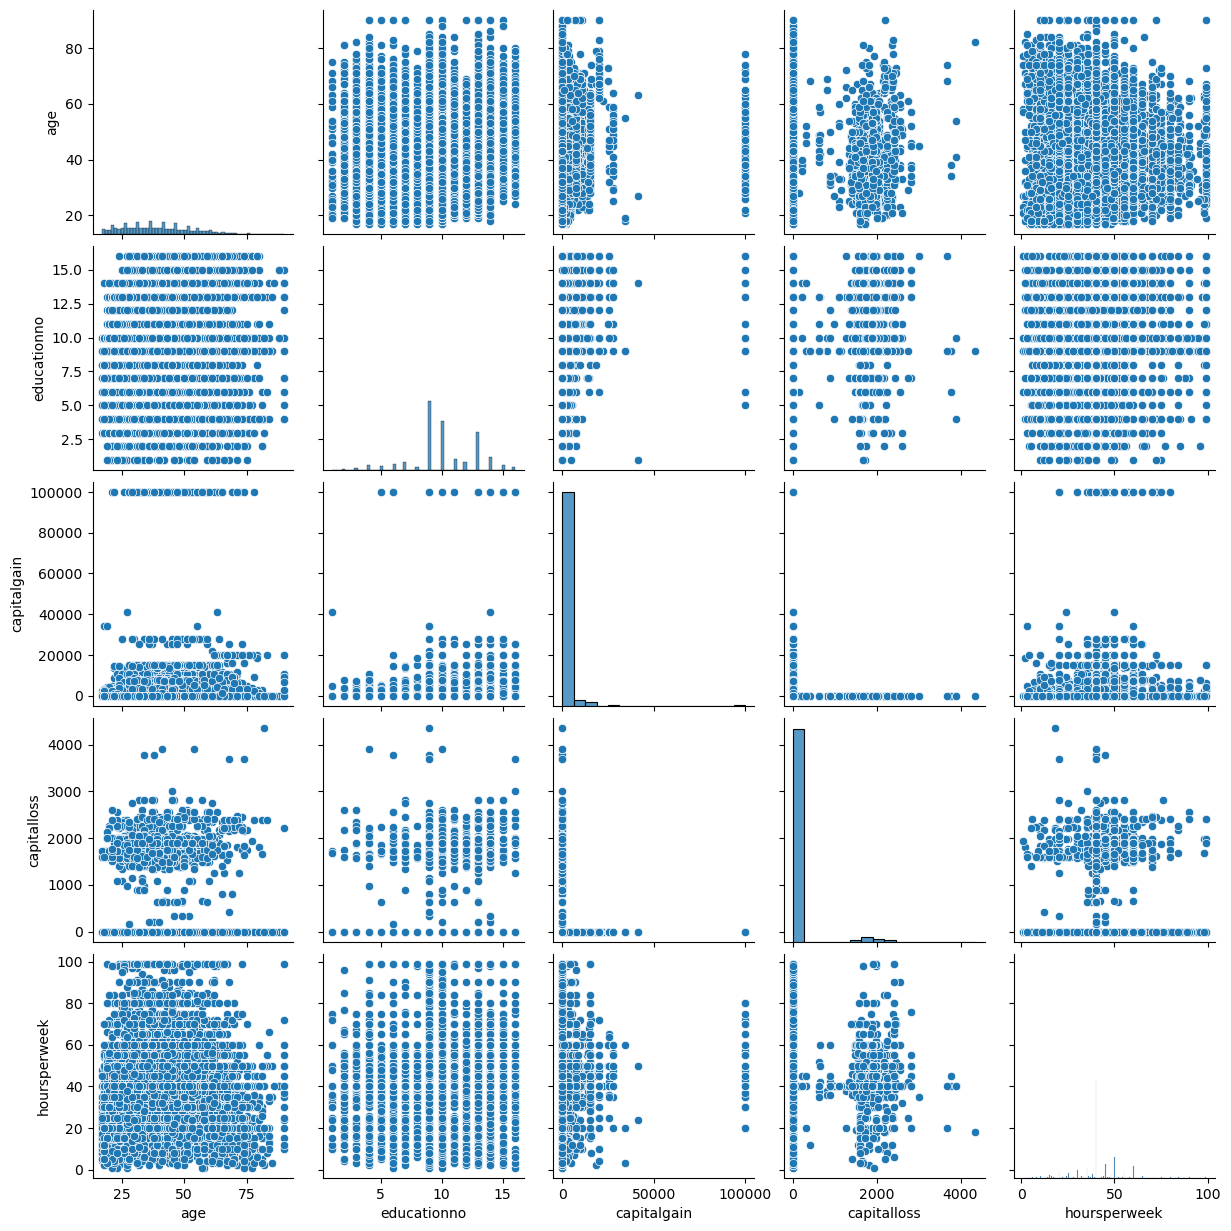

In [10]:
sns.pairplot(salary_train)

In [11]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


C:\Users\shree\AppData\Local\Temp\ipykernel_17296\2956119096.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salary_train.corr(),annot = True)


<Axes: >

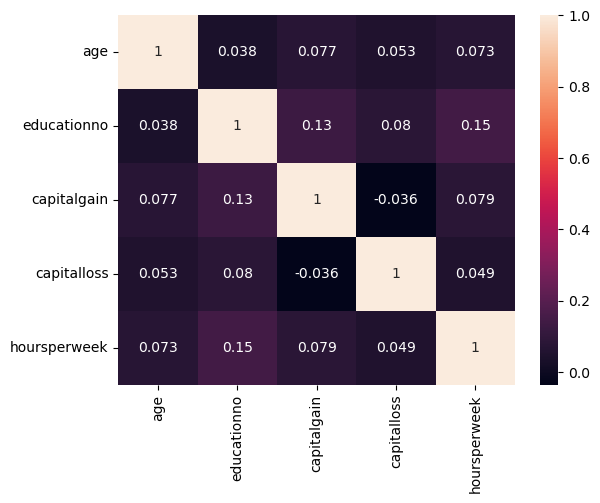

In [12]:
sns.heatmap(salary_train.corr(),annot = True)

## Data Preprocessing

1. Age

C:\Users\shree\AppData\Local\Temp\ipykernel_17296\2959233175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_train['age'])


<Axes: xlabel='age', ylabel='Density'>

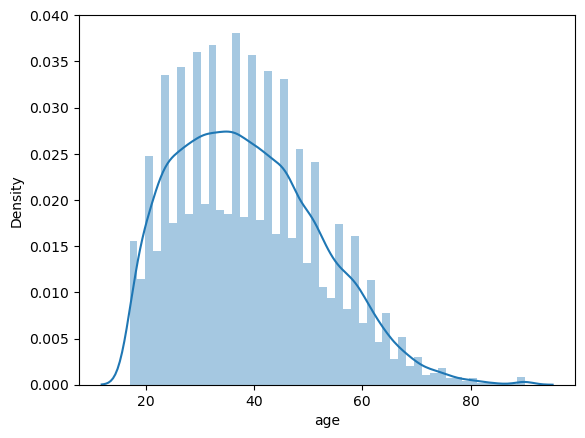

In [13]:
sns.distplot(salary_train['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2413ba3f7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2413b9d5720>,
 'boxes': [<matplotlib.lines.Line2D at 0x2413ba3f520>],
 'medians': [<matplotlib.lines.Line2D at 0x2413b957610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2413ba3e4a0>],
 'means': []}

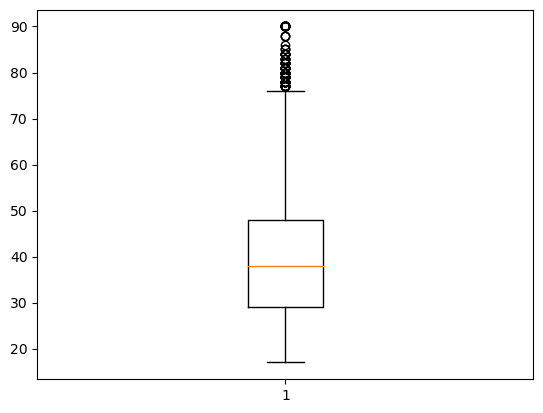

In [14]:
plt.boxplot(salary_train['age'])

In [15]:
def outlier_cap(df,column):
    for index, row in df.iterrows():
        h = df[column].quantile(0.75)
        l = df[column].quantile(0.25)
        IQR = h - l
        upper_threshold = h + 1.5*IQR
        lower_threshold = l - 1.5*IQR
        if row[column] > upper_threshold:
            df.at[index, column] = upper_threshold
        elif row[column] < lower_threshold:
            df.at[index, column] = lower_threshold

In [16]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [17]:
col = ['age','capitalgain','capitalloss', 'hoursperweek']

In [18]:
# for i in col:
#     outlier_cap(salary_train,i)

2. WorkClass

In [19]:
salary_train['workclass'].value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [20]:
pd.crosstab(salary_train['workclass'],salary_train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


3. education

In [21]:
salary_train['education'].value_counts()

 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

4. educationno

{'whiskers': [<matplotlib.lines.Line2D at 0x2413cd6c640>,
 'caps': [<matplotlib.lines.Line2D at 0x2413cd6cb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2413cd6c3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2413cd6d0c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2413cd6d360>],
 'means': []}

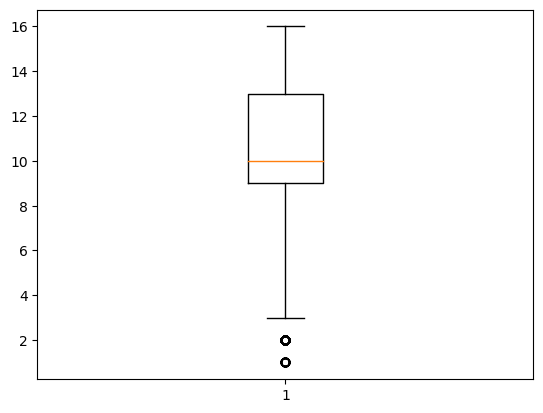

In [22]:
plt.boxplot(salary_train['educationno'])

C:\Users\shree\AppData\Local\Temp\ipykernel_17296\644617539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_train['educationno'])


<Axes: xlabel='educationno', ylabel='Density'>

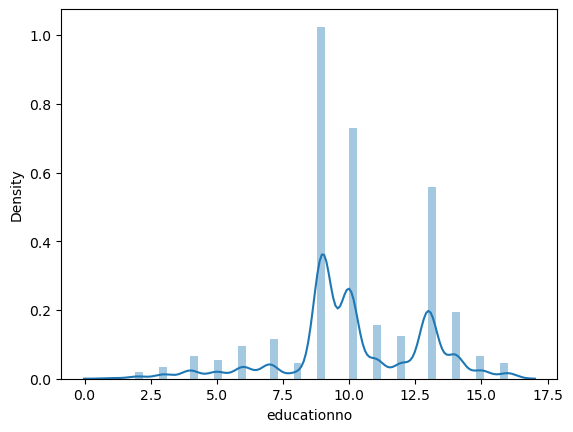

In [23]:
sns.distplot(salary_train['educationno'])

5. maritalstatus

In [24]:
salary_train['maritalstatus'].value_counts()

 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

6. occupation

In [25]:
salary_train['occupation'].value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

7. relationship

In [26]:
salary_train['relationship'].value_counts()

 Husband           10809
 Not-in-family      7115
 Own-child          3655
 Unmarried          3086
 Wife               1366
 Other-relative      872
Name: relationship, dtype: int64

8. race

In [27]:
salary_train['race'].value_counts()

 White                 22758
 Black                  2734
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

9. Sex

In [28]:
salary_train['sex'].value_counts()

 Male      17961
 Female     8942
Name: sex, dtype: int64

10. capitalgain

{'whiskers': [<matplotlib.lines.Line2D at 0x2413ced0340>,
 'caps': [<matplotlib.lines.Line2D at 0x2413ced0880>,
 'boxes': [<matplotlib.lines.Line2D at 0x2413ced00a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2413ced0ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2413ced0f40>],
 'means': []}

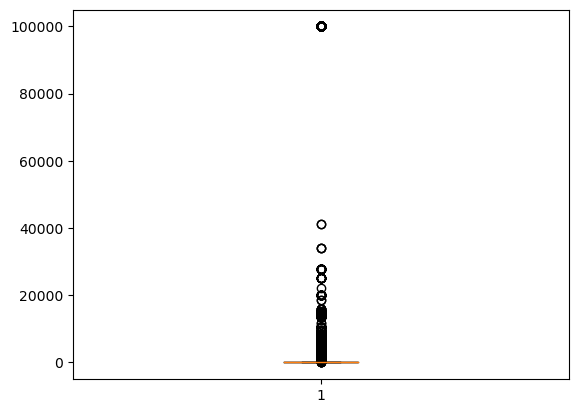

In [29]:
plt.boxplot(salary_train['capitalgain'])

11. capitalloss

{'whiskers': [<matplotlib.lines.Line2D at 0x2413cf170a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2413cf175e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2413cf16e00>],
 'medians': [<matplotlib.lines.Line2D at 0x2413cf17b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2413cf17dc0>],
 'means': []}

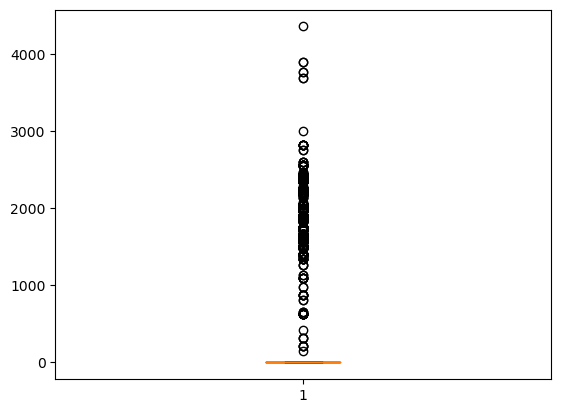

In [30]:
plt.boxplot(salary_train['capitalloss'])

12. hoursperweek

{'whiskers': [<matplotlib.lines.Line2D at 0x2413cfa13f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2413cfa1540>,
 'boxes': [<matplotlib.lines.Line2D at 0x2413cfa1150>],
 'medians': [<matplotlib.lines.Line2D at 0x2413cfa1a80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2413cfa1d20>],
 'means': []}

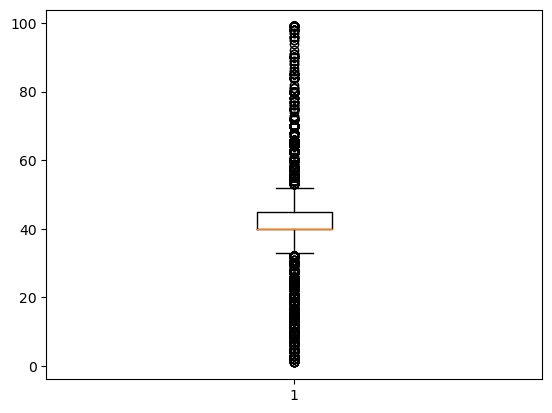

In [31]:
plt.boxplot(salary_train['hoursperweek'])

13. Native

In [32]:
salary_train['native'].value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

14. Salary

In [33]:
salary_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [34]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [36]:
x_train = salary_train.drop(columns = ['Salary'])

In [37]:
x_test = salary_test.drop(columns = ['Salary'])

In [38]:
y_train = salary_train['Salary']

In [39]:
y_test = salary_test['Salary']

In [40]:
le = LabelEncoder()

In [41]:
x_train['education_encoded'] = le.fit_transform(x_train['education'])

In [42]:
x_train.drop(columns = ['education'],inplace = True)

In [43]:
x_train_encoded = pd.get_dummies(x_train, drop_first = True)

In [44]:
x_train_encoded

,age,educationno,capitalgain,capitalloss,hoursperweek,education_encoded,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,9,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,11,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,14,0,0,40,12,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30155,22,10,0,0,40,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30156,27,12,0,0,38,7,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,11,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
x_test['education_encoded'] = le.fit_transform(x_test['education'])

In [46]:
x_test.drop(columns = ['education'],inplace = True)

In [47]:
x_test_encoded = pd.get_dummies(x_test, drop_first = True)

In [48]:
x_test_encoded

,age,educationno,capitalgain,capitalloss,hoursperweek,education_encoded,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,11,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,7,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
y_train_encoded = le.fit_transform(y_train)

In [50]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 1])

In [51]:
y_test_encoded = le.fit_transform(y_test)

In [52]:
y_test_encoded

array([0, 0, 1, ..., 0, 0, 1])

## Model Building

In [53]:
nb = MultinomialNB()
nb.fit(x_train_encoded,y_train_encoded)
ypred = nb.predict(x_test_encoded)
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded,ypred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     10620
           1       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130



In [55]:
print('Training Accuarcy: ', nb.score(x_train_encoded,y_train_encoded))
print('Test Accuracy: ',nb.score(x_test_encoded,y_test_encoded))

Training Accuarcy:  0.7683158012117608
Test Accuracy:  0.7733899504600141


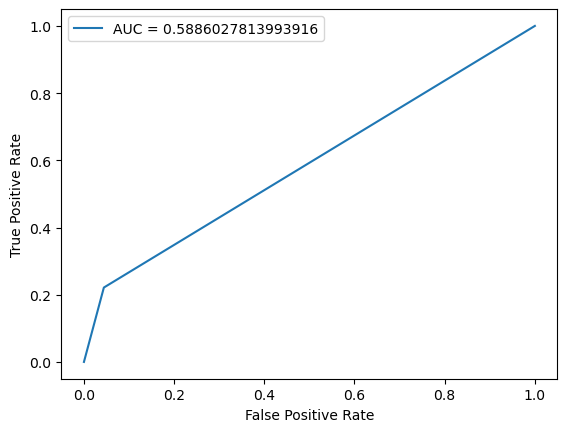

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_encoded,ypred)
auc = roc_auc_score(y_test_encoded,ypred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_encoded,ypred)
recall = recall_score(y_test_encoded,ypred)
f1 = f1_score(y_test_encoded,ypred)

In [63]:
print(f"precision :{precision},\nrecall: {recall},\nf1 :{f1}")

precision :0.6235955056179775,
recall: 0.22136752136752136,
f1 :0.3267451640033642
